In [472]:
import pandas as pd
import missingno as msno
from pathlib import Path
import missingno as msno
import datetime

import matplotlib.pyplot as plt

%config InlineBackend.figure_formats = ['svg']

In [473]:
output_dir = Path("./output/")
stn_files = output_dir.glob('*U*.parquet') # get only GHCND stations 
dfs = [pd.read_parquet(i) for i in stn_files]

stn_data = []

for df in dfs:
    df.index = df['date']
    #df = df[~df.index.duplicated()]
    #df = df[['station','value']]

    stn = str(df['station'].iloc[0]) # get station as str
    df = df.pivot(columns="datatype", values=["value"]) # pivot to colsz
    
    df = df.asfreq("D") # set to monotonic index
    #df['value']['station'] = stn # reassign station
    df.columns = df.columns.droplevel(0)
    df['station'] = stn # reassign station
    stn_data.append(df)

In [474]:
for df in out:
    print(f"vars available at {df['station'].iloc[0]}")
    print(df.columns.values)
    print()

vars available at GHCND:US1CASB0020
['PRCP' 'SNOW' 'SNWD' 'station']

vars available at GHCND:USW00023243
['AWND' 'PGTM' 'PRCP' 'TMAX' 'TMIN' 'WDF2' 'WDF5' 'WSF2' 'WSF5' 'WT01'
 'WT02' 'WT03' 'WT08' 'station']

vars available at GHCND:USC00045064
['DAPR' 'MDPR' 'PRCP' 'SNOW' 'SNWD' 'TMAX' 'TMIN' 'TOBS' 'WT01' 'WT03'
 'WT04' 'WT05' 'WT06' 'WT11' 'station']

vars available at GHCND:USC00047016
['DAPR' 'MDPR' 'PRCP' 'SNOW' 'SNWD' 'station']

vars available at GHCND:USR0000CVND
['TAVG' 'TMAX' 'TMIN' 'station']

vars available at GHCND:US1CASB0002
['PRCP' 'SNOW' 'station']

vars available at GHCND:US1CASB0007
['PRCP' 'SNOW' 'SNWD' 'station']

vars available at GHCND:USC00047681
['MDPR' 'PRCP' 'SNOW' 'SNWD' 'TMAX' 'TMIN' 'WT03' 'station']

vars available at GHCND:USC00045107
['DAPR' 'MDPR' 'PRCP' 'SNOW' 'SNWD' 'TMAX' 'TMIN' 'TOBS' 'WT01' 'WT03'
 'WT04' 'WT05' 'WT11' 'station']



In [475]:
df_all[['PRCP', 'AWND', 'TMAX', 'TMIN']]

datatype,PRCP,PRCP,PRCP,PRCP,PRCP,PRCP,PRCP,PRCP,AWND,TMAX,TMAX,TMAX,TMAX,TMAX,TMIN,TMIN,TMIN,TMIN,TMIN
1979-01-01,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,19.4,NaN,NaN,NaN,NaN,-2.8,NaN,NaN,NaN
1979-01-02,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,16.7,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1979-01-03,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,20.0,NaN,NaN,NaN,NaN,2.2,NaN,NaN,NaN
1979-01-04,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,17.8,NaN,NaN,NaN,NaN,2.8,NaN,NaN,NaN
1979-01-05,NaN,NaN,12.4,NaN,NaN,NaN,15.5,6.9,NaN,NaN,15.6,NaN,NaN,NaN,NaN,3.3,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-28,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,2.0,19.4,17.2,NaN,NaN,NaN,6.1,12.8,NaN,NaN,NaN
2023-12-29,NaN,9.1,0.5,NaN,NaN,NaN,0.0,NaN,2.5,18.3,17.8,NaN,NaN,NaN,12.8,12.8,NaN,NaN,NaN
2023-12-30,NaN,26.9,34.8,NaN,NaN,0.0,35.1,NaN,1.6,17.2,17.2,NaN,NaN,NaN,9.4,11.7,NaN,NaN,NaN
2023-12-31,NaN,0.3,0.8,NaN,NaN,2.5,1.5,NaN,1.2,16.7,16.1,NaN,NaN,NaN,7.8,8.9,NaN,NaN,NaN


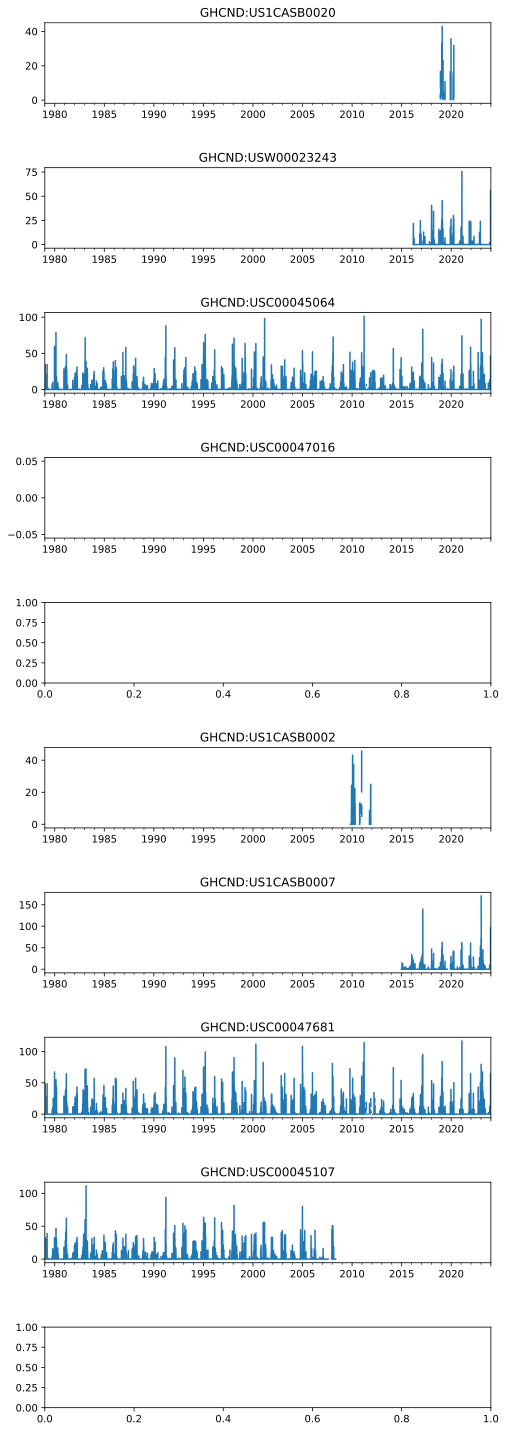

In [476]:
fig, axes = plt.subplots(nrows=10, ncols=1, figsize=(8,25))
plt.subplots_adjust(hspace=0.8)

full_index = pd.date_range(start='1979-01-01', end='2024-01-01', freq="d")

for i in range(len(dfs)):
    try: # some sites don't have precip
        stn_data[i]['PRCP'].reindex(full_index).plot(ax=axes[i], title = stn_data[i].iloc[0]['station'])
    except:
        continue

# PRECIP
# 5 of 9 sites have reasonable looking precip. of those, only 3 have a long record.

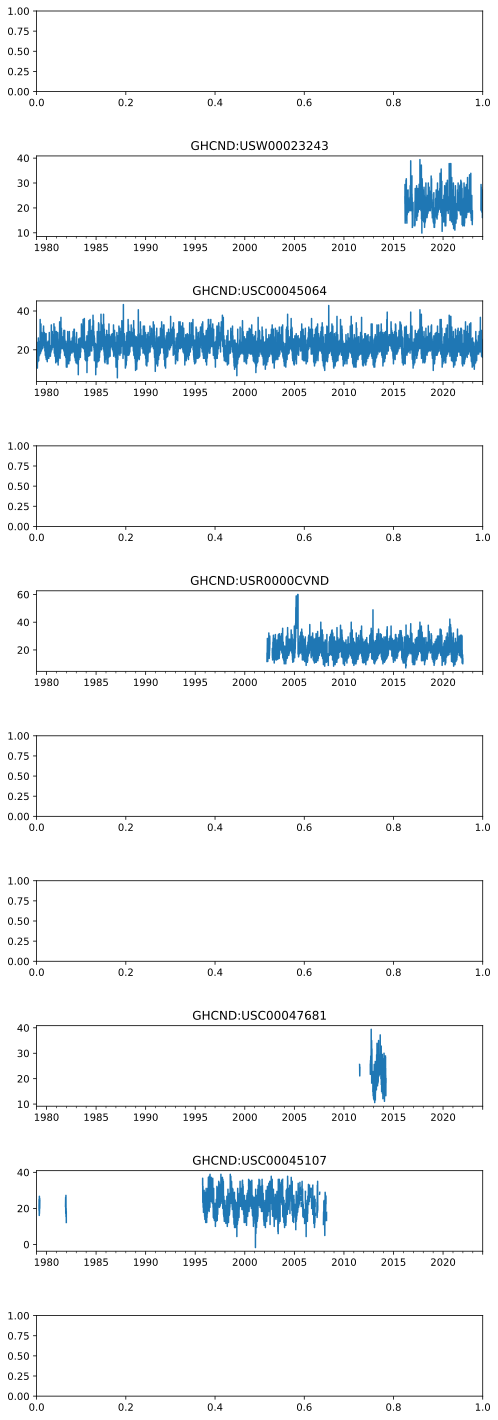

In [477]:
fig, axes = plt.subplots(nrows=10, ncols=1, figsize=(8,25))
plt.subplots_adjust(hspace=0.8)

full_index = pd.date_range(start='1979-01-01', end='2024-01-01', freq="d")

for i in range(len(dfs)):
    try: # some sites don't have precip
        stn_data[i]['TMAX'].reindex(full_index).plot(ax=axes[i], title = stn_data[i].iloc[0]['station'])
    except:
        continue

# only a cople of sites with TMAX